In [ ]:
import requests
import pandas as pd
import numpy as np
import pandas as pd

In [ ]:
resp_jatim = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TIMUR.json', verify=False)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [ ]:
print(resp_jatim)

<Response [200]>


In [ ]:
jatim_raw = resp_jatim.json()

In [ ]:
len(jatim_raw)

13

In [ ]:
jatim_raw.keys()

dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

In [ ]:
jatim_raw['data'].keys()

dict_keys(['last_update', 'kasus', 'sembuh', 'meninggal', 'perawatan'])

In [ ]:
jatim_raw['list_perkembangan']

[{'tanggal': 1584489600000,
  'KASUS': 7,
  'MENINGGAL': 1,
  'SEMBUH': 0,
  'DIRAWAT_OR_ISOLASI': 6,
  'AKUMULASI_KASUS': 7,
  'AKUMULASI_SEMBUH': 0,
  'AKUMULASI_MENINGGAL': 1,
  'AKUMULASI_DIRAWAT_OR_ISOLASI': 6},
 {'tanggal': 1584576000000,
  'KASUS': 3,
  'MENINGGAL': 0,
  'SEMBUH': 0,
  'DIRAWAT_OR_ISOLASI': 3,
  'AKUMULASI_KASUS': 10,
  'AKUMULASI_SEMBUH': 0,
  'AKUMULASI_MENINGGAL': 1,
  'AKUMULASI_DIRAWAT_OR_ISOLASI': 9},
 {'tanggal': 1584662400000,
  'KASUS': 9,
  'MENINGGAL': 0,
  'SEMBUH': 0,
  'DIRAWAT_OR_ISOLASI': 9,
  'AKUMULASI_KASUS': 19,
  'AKUMULASI_SEMBUH': 0,
  'AKUMULASI_MENINGGAL': 1,
  'AKUMULASI_DIRAWAT_OR_ISOLASI': 18},
 {'tanggal': 1584748800000,
  'KASUS': 9,
  'MENINGGAL': 1,
  'SEMBUH': 0,
  'DIRAWAT_OR_ISOLASI': 8,
  'AKUMULASI_KASUS': 28,
  'AKUMULASI_SEMBUH': 0,
  'AKUMULASI_MENINGGAL': 2,
  'AKUMULASI_DIRAWAT_OR_ISOLASI': 26},
 {'tanggal': 1584835200000,
  'KASUS': 14,
  'MENINGGAL': 0,
  'SEMBUH': 0,
  'DIRAWAT_OR_ISOLASI': 14,
  'AKUMULASI_KASUS': 42

In [ ]:
jatim_raw['kasus_total']

604991

In [ ]:
df = pd.DataFrame(jatim_raw['list_perkembangan'])

In [ ]:
df

,tanggal,KASUS,MENINGGAL,SEMBUH,DIRAWAT_OR_ISOLASI,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL,AKUMULASI_DIRAWAT_OR_ISOLASI
0,1584489600000,7,1,0,6,7,0,1,6
1,1584576000000,3,0,0,3,10,0,1,9
2,1584662400000,9,0,0,9,19,0,1,18
3,1584748800000,9,1,0,8,28,0,2,26
4,1584835200000,14,0,0,14,42,0,2,40
...,...,...,...,...,...,...,...,...,...
922,1664150400000,147,2,206,-61,604443,571647,31767,1029
923,1664236800000,82,3,113,-34,604525,571760,31770,995
924,1664323200000,190,3,71,116,604715,571831,31773,1111
925,1664409600000,59,1,92,-34,604774,571923,31774,1077


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       927 non-null    int64
 1   KASUS                         927 non-null    int64
 2   MENINGGAL                     927 non-null    int64
 3   SEMBUH                        927 non-null    int64
 4   DIRAWAT_OR_ISOLASI            927 non-null    int64
 5   AKUMULASI_KASUS               927 non-null    int64
 6   AKUMULASI_SEMBUH              927 non-null    int64
 7   AKUMULASI_MENINGGAL           927 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  927 non-null    int64
dtypes: int64(9)
memory usage: 65.3 KB


In [ ]:
df.isnull().sum()

tanggal                         0
KASUS                           0
MENINGGAL                       0
SEMBUH                          0
DIRAWAT_OR_ISOLASI              0
AKUMULASI_KASUS                 0
AKUMULASI_SEMBUH                0
AKUMULASI_MENINGGAL             0
AKUMULASI_DIRAWAT_OR_ISOLASI    0
dtype: int64

In [ ]:
jatim_tidy = df

In [ ]:
jatim_tidy['tanggal'] = pd.to_datetime(jatim_tidy['tanggal']*1e6)

In [ ]:
jatim_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tanggal                       927 non-null    datetime64[ns]
 1   KASUS                         927 non-null    int64         
 2   MENINGGAL                     927 non-null    int64         
 3   SEMBUH                        927 non-null    int64         
 4   DIRAWAT_OR_ISOLASI            927 non-null    int64         
 5   AKUMULASI_KASUS               927 non-null    int64         
 6   AKUMULASI_SEMBUH              927 non-null    int64         
 7   AKUMULASI_MENINGGAL           927 non-null    int64         
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  927 non-null    int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 65.3 KB


In [ ]:
jatim_tidy

,tanggal,KASUS,MENINGGAL,SEMBUH,DIRAWAT_OR_ISOLASI,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL,AKUMULASI_DIRAWAT_OR_ISOLASI
0,2020-03-18,7,1,0,6,7,0,1,6
1,2020-03-19,3,0,0,3,10,0,1,9
2,2020-03-20,9,0,0,9,19,0,1,18
3,2020-03-21,9,1,0,8,28,0,2,26
4,2020-03-22,14,0,0,14,42,0,2,40
...,...,...,...,...,...,...,...,...,...
922,2022-09-26,147,2,206,-61,604443,571647,31767,1029
923,2022-09-27,82,3,113,-34,604525,571760,31770,995
924,2022-09-28,190,3,71,116,604715,571831,31773,1111
925,2022-09-29,59,1,92,-34,604774,571923,31774,1077


In [ ]:
jatim_tidy2 = (jatim_tidy.drop(columns = ['AKUMULASI_KASUS', 'AKUMULASI_SEMBUH', 'AKUMULASI_MENINGGAL', 'AKUMULASI_DIRAWAT_OR_ISOLASI'], axis = 1)
                           .rename(columns = str.lower)
                           .rename(columns = {'kasus' : 'kasus_baru'})
)

In [ ]:
jatim_tidy2

,tanggal,kasus_baru,meninggal,sembuh,dirawat_or_isolasi
0,2020-03-18,7,1,0,6
1,2020-03-19,3,0,0,3
2,2020-03-20,9,0,0,9
3,2020-03-21,9,1,0,8
4,2020-03-22,14,0,0,14
...,...,...,...,...,...
922,2022-09-26,147,2,206,-61
923,2022-09-27,82,3,113,-34
924,2022-09-28,190,3,71,116
925,2022-09-29,59,1,92,-34


In [ ]:
jatim_tidy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tanggal             927 non-null    datetime64[ns]
 1   kasus_baru          927 non-null    int64         
 2   meninggal           927 non-null    int64         
 3   sembuh              927 non-null    int64         
 4   dirawat_or_isolasi  927 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 36.3 KB


In [ ]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

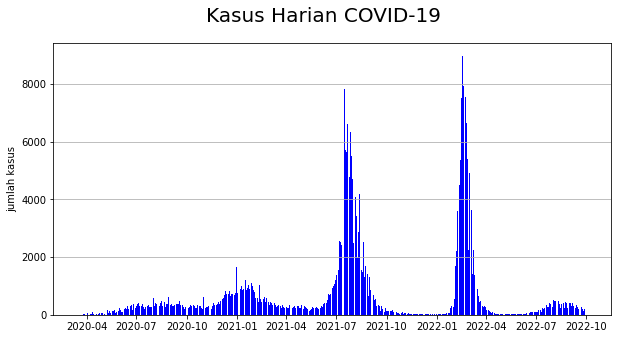

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize = (10,5))
fig.suptitle('Kasus Harian COVID-19', fontsize=20)
ax.set_ylabel('jumlah kasus')
ax.bar(data = jatim_tidy2, x='tanggal', height='kasus_baru', color='blue')
plt.grid(axis = 'y')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

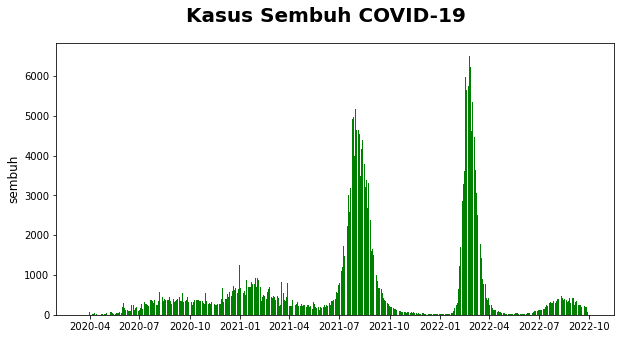

In [ ]:
plt.clf()
fig, ax= plt.subplots(figsize = (10, 5))
fig.suptitle('Kasus Sembuh COVID-19', fontsize = 20, fontweight='bold')
ax.set_ylabel('sembuh', fontsize = 12)
ax.bar(data=jatim_tidy2, x = 'tanggal', height = 'sembuh', color = 'green')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

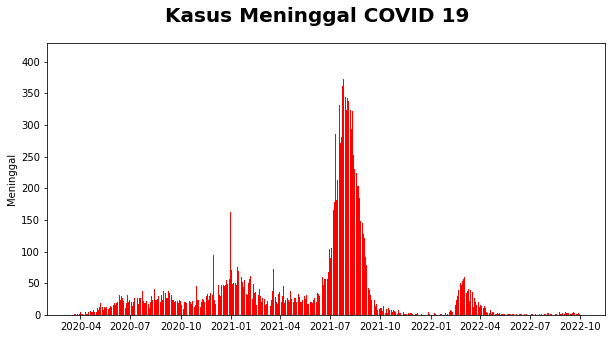

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize = (10,5))
fig.suptitle('Kasus Meninggal COVID 19', fontsize = 20, fontweight = 'bold')
ax.set_ylabel('Meninggal')
ax.bar(data = jatim_tidy2, x = 'tanggal', height = 'meninggal', color = 'red')
plt.show

In [ ]:
jatim_tidy

,tanggal,KASUS,MENINGGAL,SEMBUH,DIRAWAT_OR_ISOLASI,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL,AKUMULASI_DIRAWAT_OR_ISOLASI
0,2020-03-18,7,1,0,6,7,0,1,6
1,2020-03-19,3,0,0,3,10,0,1,9
2,2020-03-20,9,0,0,9,19,0,1,18
3,2020-03-21,9,1,0,8,28,0,2,26
4,2020-03-22,14,0,0,14,42,0,2,40
...,...,...,...,...,...,...,...,...,...
922,2022-09-26,147,2,206,-61,604443,571647,31767,1029
923,2022-09-27,82,3,113,-34,604525,571760,31770,995
924,2022-09-28,190,3,71,116,604715,571831,31773,1111
925,2022-09-29,59,1,92,-34,604774,571923,31774,1077


In [ ]:
jatim_tidy

,tanggal,KASUS,MENINGGAL,SEMBUH,DIRAWAT_OR_ISOLASI,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL,AKUMULASI_DIRAWAT_OR_ISOLASI
0,2020-03-18,7,1,0,6,7,0,1,6
1,2020-03-19,3,0,0,3,10,0,1,9
2,2020-03-20,9,0,0,9,19,0,1,18
3,2020-03-21,9,1,0,8,28,0,2,26
4,2020-03-22,14,0,0,14,42,0,2,40
...,...,...,...,...,...,...,...,...,...
922,2022-09-26,147,2,206,-61,604443,571647,31767,1029
923,2022-09-27,82,3,113,-34,604525,571760,31770,995
924,2022-09-28,190,3,71,116,604715,571831,31773,1111
925,2022-09-29,59,1,92,-34,604774,571923,31774,1077


In [ ]:
jatim_tidy = (jatim_tidy.rename(columns = str.lower))
jatim_tidy

,tanggal,kasus,meninggal,sembuh,dirawat_or_isolasi,akumulasi_kasus,akumulasi_sembuh,akumulasi_meninggal,akumulasi_dirawat_or_isolasi
0,2020-03-18,7,1,0,6,7,0,1,6
1,2020-03-19,3,0,0,3,10,0,1,9
2,2020-03-20,9,0,0,9,19,0,1,18
3,2020-03-21,9,1,0,8,28,0,2,26
4,2020-03-22,14,0,0,14,42,0,2,40
...,...,...,...,...,...,...,...,...,...
922,2022-09-26,147,2,206,-61,604443,571647,31767,1029
923,2022-09-27,82,3,113,-34,604525,571760,31770,995
924,2022-09-28,190,3,71,116,604715,571831,31773,1111
925,2022-09-29,59,1,92,-34,604774,571923,31774,1077


In [ ]:
jatim_tidy3 = (jatim_tidy.drop(columns = ['kasus', 'meninggal', 'sembuh', 'dirawat_or_isolasi', 'akumulasi_dirawat_or_isolasi'], axis = 1))

<Figure size 432x288 with 0 Axes>

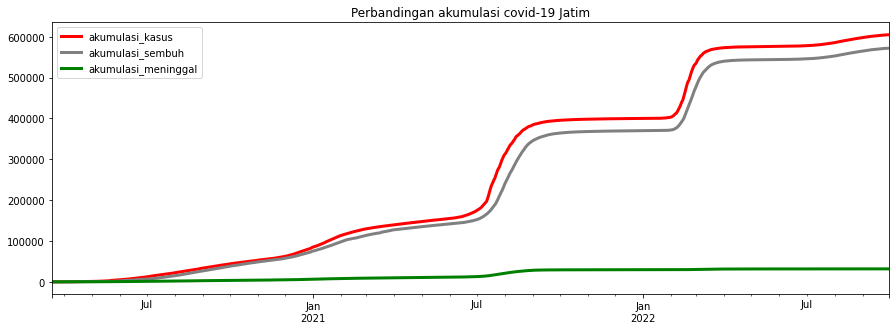

In [ ]:
plt.clf()
fig, ax = plt.subplots (figsize = (15,5))
jatim_tidy3_ts = jatim_tidy3.set_index('tanggal')
jatim_tidy3_ts.plot(kind='line', ax = ax, lw = 3, color = ['red', 'grey', 'green'])
ax.set_title('Perbandingan akumulasi covid-19 Jatim')
ax.set_xlabel('')
ax.set_label('jumlah_kasus')
plt.show()